In [2]:
import numpy as np
import magpylib as magpy
from magpylib.magnet import Cuboid, Cylinder, CylinderSegment
from maggeometry import n_rings
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt


### Optimization of 4 rings
All variables can be optimized independently for each ring set

1. Run 50 shots using Nelder-Mead with nonuniformity cost function
2. Optimize for field strength using new cost function

In [4]:
Br = 1.09e3
mag_dir = (0,0,1)
mirror1_z = True
ringset_1_config = [Br, mag_dir, mirror1_z]

r = 1.09e3
mag_dir = (0,0,1)
mirror2_z = True
ringset_2_config = [Br, mag_dir, mirror2_z]
# innerrad, width, thickness, dist
bounds = ((1, 150), (2, 20), (2, 20), (1, 300),
          (1, 150), (2, 20), (2, 20), (1, 300))

### Definition of 4 ring objective function

In [6]:
from maggeometry import n_rings
from maghelper import get_field_on_axes, get_nonuniformity, make_flux_stream, centered_sweep_range, get_grid_nonuniformity, make_xy_grid
grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
def obj1_nonuniformity(x):
    obj_ring_config=[[*ringset_1_config, *x[0:4]], [*ringset_2_config, *x[4:8]]]
    magnets = n_rings(obj_ring_config)
    grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res)
    return av_nonuniformity

In [6]:
import numpy as np
from scipy.optimize import minimize, Bounds
from maggeometry import n_rings
from maghelper import get_field_on_axes, get_nonuniformity, make_flux_stream, centered_sweep_range, get_grid_nonuniformity, make_grid
from alive_progress import alive_bar

options = {'disp':True, 'fatol': 1e-12, 'maxiter':5e3}
method = "Nelder-Mead"

shots = 50
results_x = []
results_fun = []
guesses_x0 = []
with alive_bar(shots, force_tty=True) as bar:
    for i in range(shots):
        x0 = np.zeros(len(bounds))
        for b in range(len(bounds)):
            x0[b] = np.random.uniform(low=bounds[b][0], high=bounds[b][1])
        res = minimize(obj1_nonuniformity, x0, method=method, options=options, bounds=bounds)
        guesses_x0.append(x0)
        results_x.append(res.x)
        results_fun.append(res.fun)
        bar()

print("Objective function values:")
print(results_fun)
print("Result parameters:")
print(results_x)
print("Starting guesses:")
print(guesses_x0)

on 0: Optimization terminated successfully.                                     
on 0:          Current function value: 0.000001                                 
on 0:          Iterations: 1768                                                 
on 0:          Function evaluations: 2724                                       
on 1: Optimization terminated successfully.                                     
on 1:          Current function value: 0.000002                                 
on 1:          Iterations: 824                                                  
on 1:          Function evaluations: 1277                                       
on 2: Optimization terminated successfully.                                     
on 2:          Current function value: 0.000000                                 
on 2:          Iterations: 1129                                                 
on 2:          Function evaluations: 1737                                       
on 3: Optimization terminate

on 7: /var/folders/06/7pjfbw510cz2ch1m7lx8vvl80000gn/T/ipykernel_51750/2421128397.py:19: RuntimeWarning: Maximum number of iterations has been exceeded.
        res = minimize(obj1_nonuniformity, x0, method=method, options=options, bounds=bounds)


on 8: Optimization terminated successfully.                                     
on 8:          Current function value: 0.000001                                 
on 8:          Iterations: 1293                                                 
on 8:          Function evaluations: 2048                                       
on 9: Optimization terminated successfully.                                     
on 9:          Current function value: 0.000001                                 
on 9:          Iterations: 1992                                                 
on 9:          Function evaluations: 3047                                       
on 10: Optimization terminated successfully.                                    
on 10:          Current function value: 0.000000                                
on 10:          Iterations: 3444                                                
on 10:          Function evaluations: 5158                                      
on 11: Optimization terminat

In [16]:
from maggeometry import n_rings
from maghelper import get_field_on_axes, get_nonuniformity, make_flux_stream, centered_sweep_range, get_grid_nonuniformity, make_xy_grid
grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
results_g_center = []
for x in results_x:
    obj_ring_config=[[*ringset_1_config, *x[0:4]], [*ringset_2_config, *x[4:8]]]
    magnets = n_rings(obj_ring_config)
    grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res)
    results_g_center.append(center_field)
print(results_g_center)

[13.559112711614585, 785.548924517574, 66.08298046291267, 85.09463126446079, 92.60093403941163, 66.24416378722744, 63.124246734111935, 43.38445946044054, 7.674214004621431, 10.402638636279452, 8.97453649583742, 9.989141427065853, 92.6009390556901, 16.558545531407525, 81.66077731341176, 63.91706778562913, 92.60081522954708, 21.714913943341667, 10834.231992735182, 9.83652289871575, 20.701463530793774, 58.08129190121292, 31.679999479118717, 21.449310094114445, 2.4292170099944554, 17.113783961833246, 15.054294099316401, 13.987959460604156, 67.91035050713685, 9.418355325195344, 144.96605999219383, 46.18273074514885, 7.2026580754394605, 53.18275814686736, 13.698804646906417, 3.718209972126555, 90.41800189038386, 8.416953289411712, 3.3269740589193386, 14.33325031385529, 13.011060039992854, 4.093041100822823, 3.532680307527075, 4.007655907330996, 5.883749829771743, 7.789564545368641, 10.669772893569903, 27.368003673172588, 92.60091792092607, 6.387031015099369]


In [17]:
from maghelper import make_opt_res_csv
b, b_df = make_opt_res_csv('results/4 rings/2023_07_12_stage1opt_4rings_1090T_', results_fun, results_g_center, results_x, guesses_x0)

Number of unique results: 50
    nonuniformity  center_field_gauss  r_1_innerrad  r_1_width  r_1_thickness  \
0    5.539309e-10           16.558546    141.480575  15.263487       4.759599   
1    9.236476e-10           46.182731     57.109614  12.618070      16.110109   
2    2.017296e-09            5.883750     64.366110   2.001074      15.925742   
3    2.589654e-09           27.368004     16.821787  19.971851       2.222122   
4    3.070982e-09            3.718210    147.232334  20.000000       2.000000   
5    3.958995e-09            8.416953     29.991379   9.878306       9.706895   
6    4.191798e-09           14.333250     22.899392   9.022643      19.521113   
7    6.179050e-09            3.532680      2.781310   8.904735       4.869928   
8    7.453438e-09           66.244164     28.134094  14.814148       5.706662   
9    1.093199e-08           43.384459    143.468147  19.580728       7.534117   
10   1.153677e-08           13.698805    148.574030  12.890067       3.916159   

### Define 2nd stage multiobjective cost function
Only use results that are within +60% of minimum homogeneity for stage 2

In [1]:
import numpy as np
import pandas as pd

guess_threshold = 2 # only use results that are within +x% of minimum homogeneity for stage 2

st1 = pd.read_csv('results/4 rings/2023_07_12_stage1opt_4rings_1090T_50.csv')
st1 = np.delete(st1.to_numpy(), 0, axis=1) #remove first column of indices
min_nonun = st1[0][0]
nonun_threshold = min_nonun*guess_threshold
print("Nonuniformity threshold:", nonun_threshold)
st2g = st1[st1[:,0] < nonun_threshold]
print(len(st2g))

Nonuniformity threshold: 1.107861880880614e-09
2


In [14]:
Br = 1.09e3
mag_dir = (0,0,1)
mirror1_z = True
ringset_1_config = [Br, mag_dir, mirror1_z]

r = 1.09e3
mag_dir = (0,0,1)
mirror2_z = True
ringset_2_config = [Br, mag_dir, mirror2_z]
# innerrad, width, thickness, dist
bounds2 = ((1, 150), (2, 20), (2, 20), (1, 300),
           (1, 150), (2, 20), (2, 20), (1, 300))

In [58]:
from maggeometry import n_rings, three_rings
from maghelper import get_field_on_axes, get_nonuniformity, make_flux_stream, centered_sweep_range, get_grid_nonuniformity, make_xy_grid
# 10G target
field_strength_target = 10
dist1 = 0

grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
alpha = 0.2 # weight for multiobjective optimization
def obj2_nonuniformity(x):
    innerrad1, width1, thickness1, dist1, innerrad2, width2, thickness2, dist2 = x
    obj_ring_config = [[Br, mag_dir, mirror1_z, innerrad1, width1, thickness1, dist1],
                       [Br, mag_dir, mirror2_z, innerrad2, width2, thickness2, dist2]]
    magnets = n_rings(obj_ring_config)
    grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res, use_z=True)
#     cost = av_nonuniformity*abs(center_field - field_strength_target)
#     cost = av_nonuniformity*abs(center_field - field_strength_target)**2
#     cost = av_nonuniformity * 1e10 + abs(center_field - field_strength_target)
#     cost = av_nonuniformity*np.exp(abs(center_field - field_strength_target)**2)
    cost = alpha*av_nonuniformity * 1e8 + (1-alpha)*abs(center_field - field_strength_target)
    return cost

### Optimize 4 rings 2nd stage

In [59]:
import numpy as np
from scipy.optimize import minimize, Bounds
from maggeometry import n_rings
from maghelper import get_field_on_axes, get_nonuniformity, make_flux_stream, centered_sweep_range, get_grid_nonuniformity, make_grid
from alive_progress import alive_bar
import random
results2_x = []
results2_fun = []
method2 = 'Nelder-Mead'
options2 = {'disp':True, 'fatol': 1e-17, 'adaptive': True}
#             'maxiter':0.5e3
s = 0.0
with alive_bar(len(st2g), force_tty=True) as bar:
    for s0 in st2g:
        innerrad1, width1, thickness1, dist1 = s0[2:6]
        innerrad2, width2, thickness2, dist2 = s0[6:10]
        res2 = minimize(obj2_nonuniformity, [innerrad1 + random.uniform(-s, s),
                                             width1 + random.uniform(-s, s),
                                             thickness1 + random.uniform(-s, s),
                                             dist1 + random.uniform(-s, s),
                                             innerrad2 + random.uniform(-s, s),
                                             width2 + random.uniform(-s, s),
                                             thickness2 + random.uniform(-s, s),
                                             dist2 + random.uniform(-s, s)], method=method2, options=options2, bounds=bounds2)
        print(res2.x)
        results2_x.append(res2.x)
        results2_fun.append(res2.fun)
        bar()
        
print(results2_x)
print(results2_fun)

on 0: [142.01911226  13.98861633   4.36462882 149.67603803  54.95691241         
         2.63125266  17.66198859 163.97001015]


on 0: /var/folders/06/7pjfbw510cz2ch1m7lx8vvl80000gn/T/ipykernel_53009/3224802473.py:17: RuntimeWarning:
      
      Maximum number of function evaluations has been exceeded.


on 1: [ 55.65623726  12.54221435  13.09021524 200.89590671 145.73066921         
         7.78703102  13.89142728 151.78955199]
|████████████████████████████████████████| 2/2 [100%] in 1:55.1 (0.01/s)        
[array([142.01911226,  13.98861633,   4.36462882, 149.67603803,
        54.95691241,   2.63125266,  17.66198859, 163.97001015]), array([ 55.65623726,  12.54221435,  13.09021524, 200.89590671,
       145.73066921,   7.78703102,  13.89142728, 151.78955199])]
[3.935584613293948, 18.08571396823806]


In [60]:
from maggeometry import n_rings, three_rings
grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
results2_nonun = []
results2_g_center = []
for x in results2_x:
#     innerrad1, width1, thickness1, innerrad2, width2, thickness2, dist2 = x
    obj_ring_config=[[*ringset_1_config, *x[0:4]], [*ringset_2_config, *x[4:8]]]
    magnets = n_rings(obj_ring_config)
    grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res)
    results2_nonun.append(obj1_nonuniformity(x))
    results2_g_center.append(center_field)

print(results2_nonun)
print(results2_g_center)

[1.3466567321752288e-08, 9.580798313037168e-08]
[14.582816583573628, 30.211942882038283]


Nonuniformity threshold: 1e-06
35
On x-axis:
Maximum B-field: 16.559 G
Central B-field: 16.559 G
Min nonuniformity: 0.0
Max nonuniformity:3.3354776396421444e-05


On y-axis:
Maximum B-field: 16.559 G
Central B-field: 16.559 G
Min nonuniformity: 0.0
Max nonuniformity:3.3354776396421444e-05


On z-axis:
Maximum B-field: 16.559 G
Central B-field: 16.559 G
Min nonuniformity: 0.0
Max nonuniformity:1.0205263455182323e-05




/Users/nelson/Documents/quantum/quantum_notes/projects/b_field/simulations/b-field-uniformity/maghelper.py:261: UserWarning:

Attempt to set non-positive ylim on a log-scaled axis will be ignored.

/Users/nelson/Documents/quantum/quantum_notes/projects/b_field/simulations/b-field-uniformity/maghelper.py:267: UserWarning:

Attempt to set non-positive ylim on a log-scaled axis will be ignored.

/Users/nelson/Documents/quantum/quantum_notes/projects/b_field/simulations/b-field-uniformity/maghelper.py:273: UserWarning:

Attempt to set non-positive ylim on a log-scaled axis will be ignored.



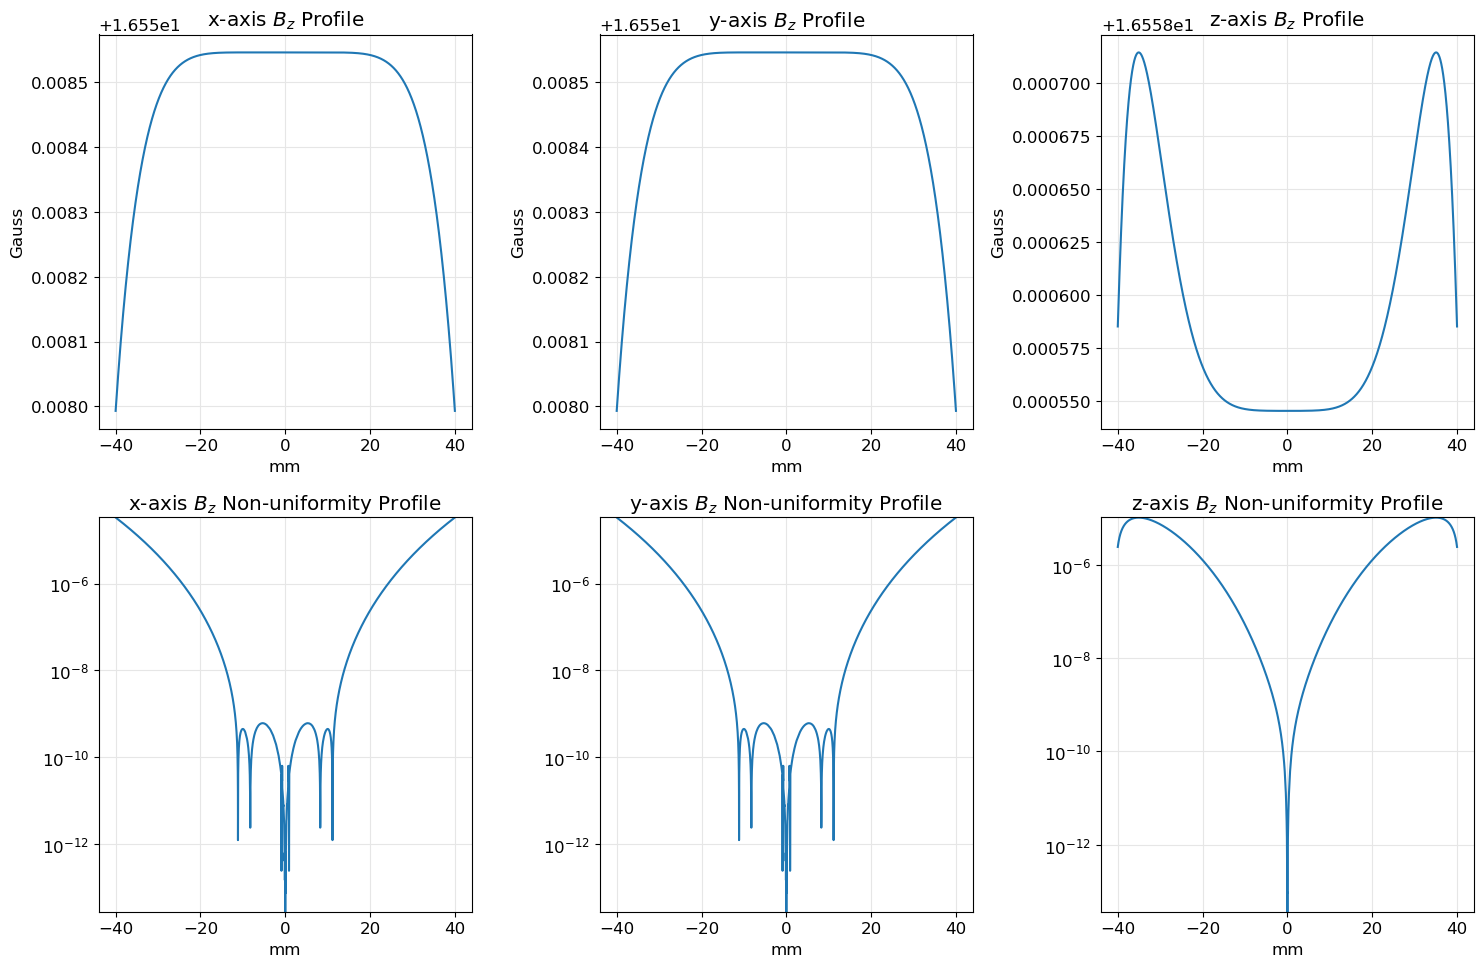

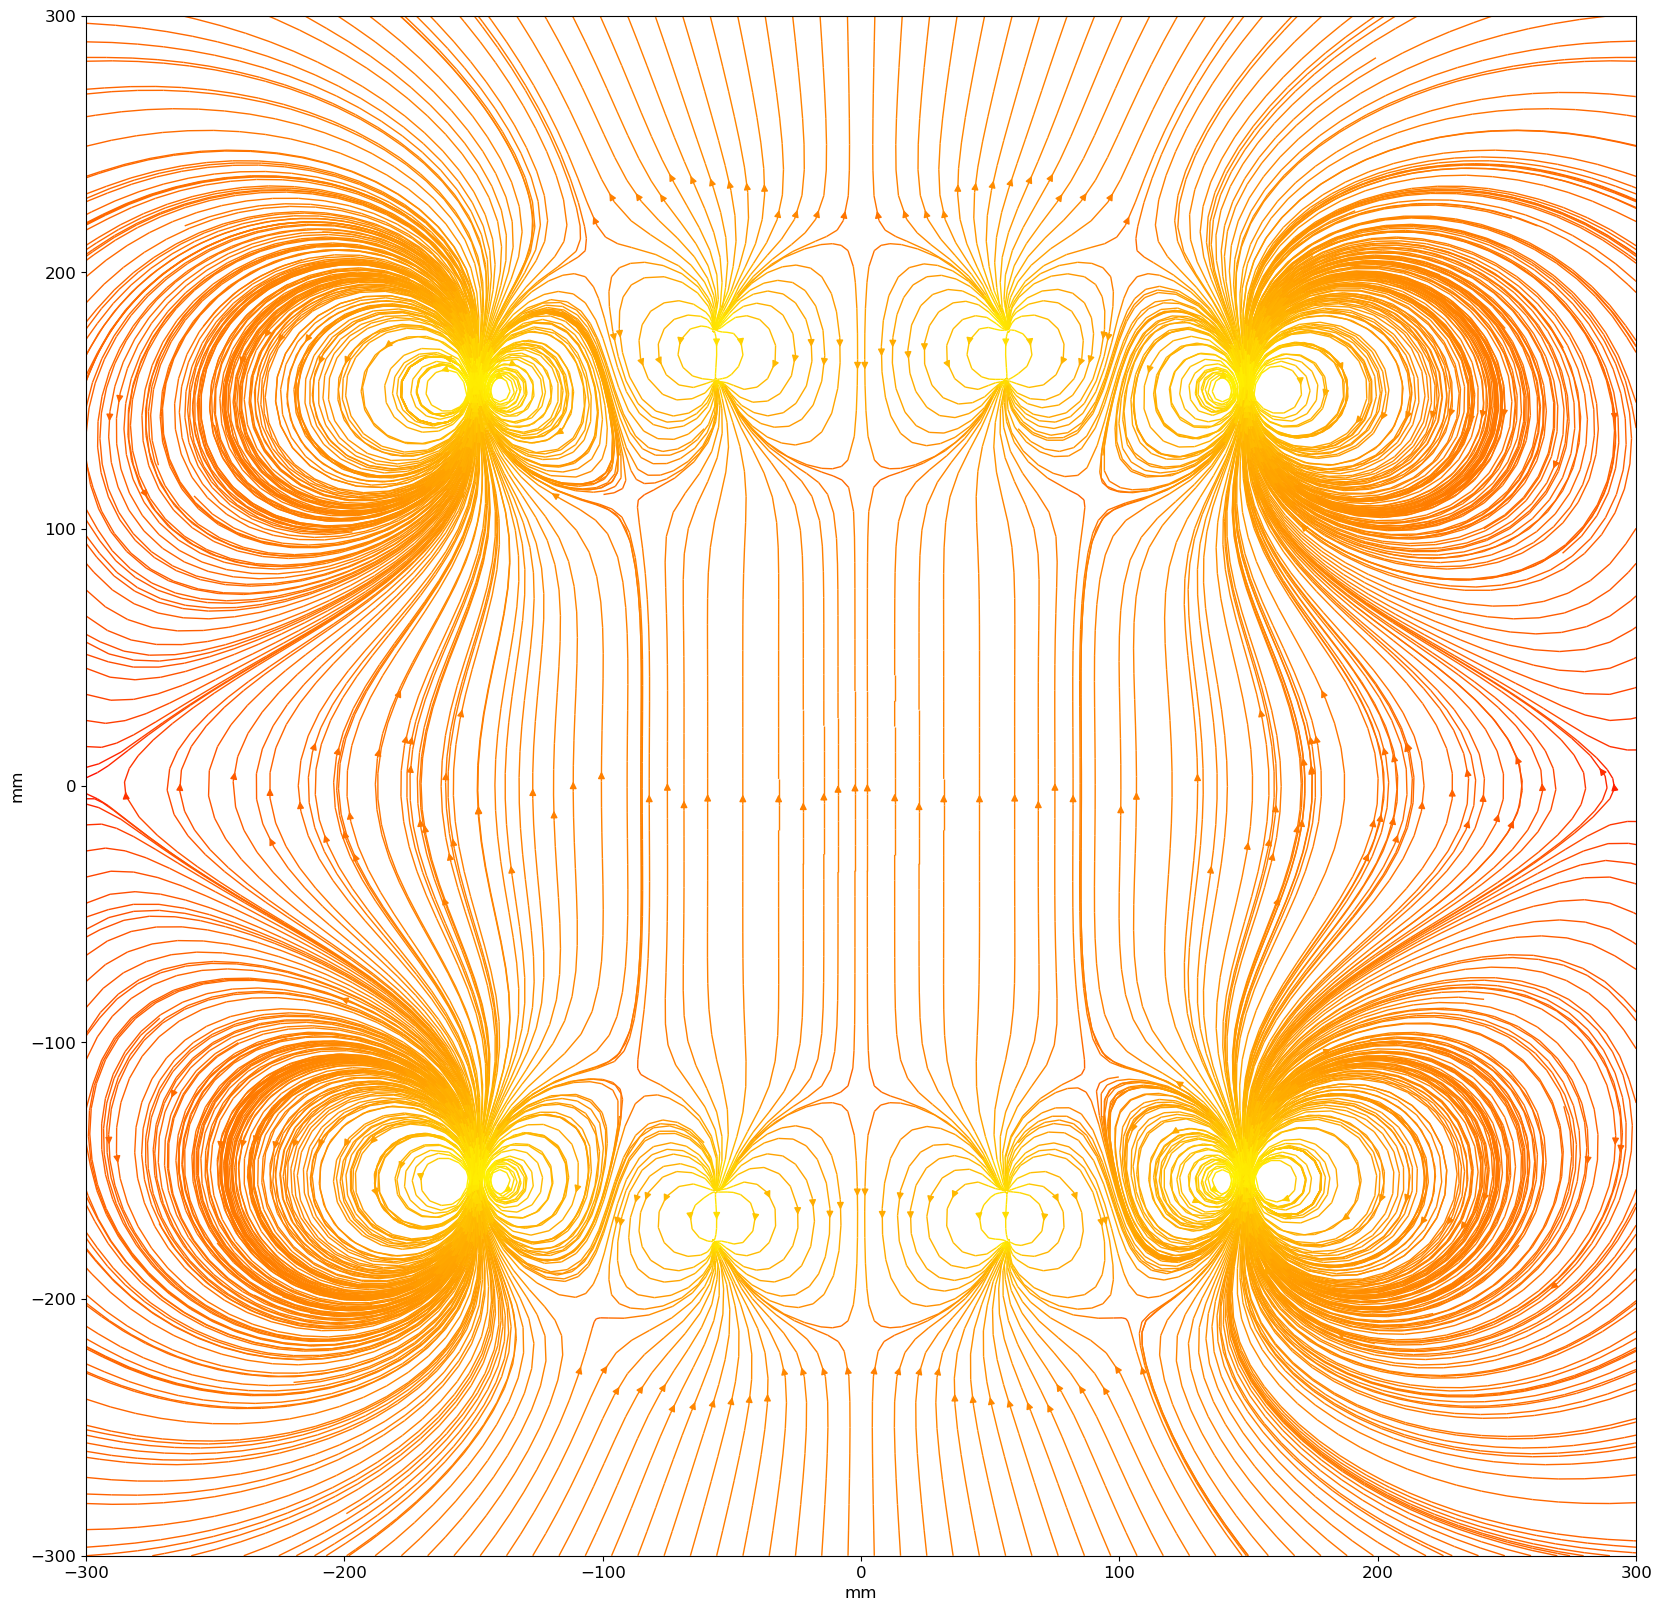

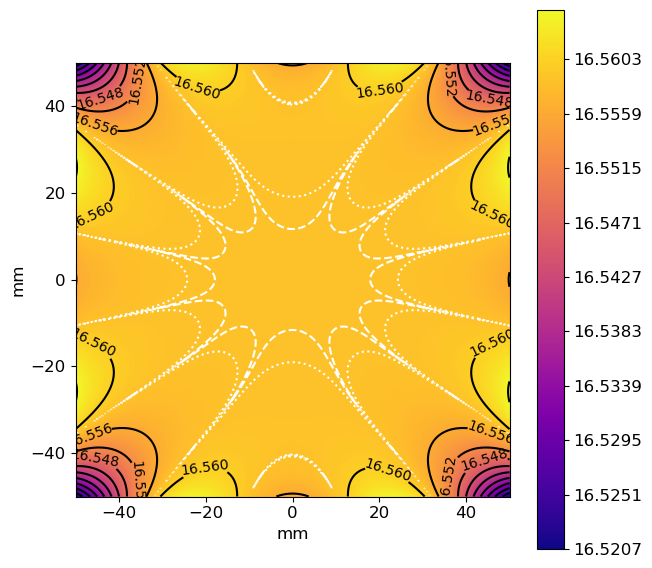

In [11]:
import pandas as pd
import numpy as np
from maggeometry import four_rings, n_rings
from maghelper import get_field_on_axes, get_nonuniformity, make_flux_stream, centered_sweep_range, get_grid_nonuniformity, make_grid, plot_uniform_region_side_view
# innerrad1, width1, thickness1, dist1, innerrad2, width2, thickness2, dist2
st1 = pd.read_csv('results/4 rings/2023_07_12_stage1opt_4rings_1090T_50.csv')
st1 = np.delete(st1.to_numpy(), 0, axis=1) #remove first column of indices
min_nonun = st1[0][0]
# nonun_threshold = min_nonun*guess_threshold
nonun_threshold = 1e-6
print("Nonuniformity threshold:", nonun_threshold)
st2g = st1[st1[:,0] < nonun_threshold]
print(len(st2g))

Br = 1.09e3
mag_dir = (0,0,1)
mirror1_z = True
ringset_1_config = [Br, mag_dir, mirror1_z]

r = 1.09e3
mag_dir = (0,0,1)
mirror2_z = True
ringset_2_config = [Br, mag_dir, mirror2_z]
# innerrad, width, thickness, dist
bounds2 = ((1, 150), (2, 20), (2, 20), (1, 300),
           (1, 150), (2, 20), (2, 20), (1, 300))

x = st2g[0]
x1 = x
Br = 1.09e3
obj_ring_config=[[*ringset_1_config, *x1[2:6]], [*ringset_2_config, *x1[6:10]]]
magnets = n_rings(obj_ring_config)

sens_len = 40
get_field_on_axes(magnets, [[-sens_len, sens_len], [-sens_len, sens_len], [-sens_len, sens_len]], True)
x_bounds = [-300, 300]
z_bounds = [-300, 300]

make_flux_stream(magnets, x_bounds, z_bounds, [])
d = h =50
plot_uniform_region_side_view(magnets, [-d, d], [-h, h])

In [12]:
from maghelper import get_cuboid_nonuniformity_coverage
b= d
v_uni = get_cuboid_nonuniformity_coverage(magnets, [-d, d], [-b, b], [-h, h], 101)

Proportion of uniform region (<1e-6) in central 100 * 100 * 100 = 1000000 mm^3: 8.044%
Volume of uniform region (<1e-6): 80437.659 mm^3 = 80.438 cm^3


In [86]:
st2g2 = st1[5:10]
results2_x = []
results2_fun = []
method2 = 'Nelder-Mead'
options2 = {'disp':True, 'fatol': 1e-17,
#             'maxiter':0.5e3
           }
with alive_bar(len(st2g2), force_tty=True) as bar:
    for s0 in st2g2:
        innerrad1, width1, thickness1 = s0[2:5]
        innerrad2, width2, thickness2, dist2 = s0[6:10]
        res2 = minimize(obj2_nonuniformity, [innerrad1, width1, thickness1, innerrad2, width2, thickness2, dist2], method=method2, options=options2, bounds=bounds2)
        print(res2.x)
        results2_x.append(res2.x)
        results2_fun.append(res2.fun)
        bar()
        
print(results2_x)
print(results2_fun)

on 0: [120.99652309  11.44496932   4.06953278 147.91960699  15.1965081          
        11.2103605   78.38435151]


on 0: /var/folders/06/7pjfbw510cz2ch1m7lx8vvl80000gn/T/ipykernel_50927/2344889787.py:12: RuntimeWarning: Maximum number of function evaluations has been exceeded.
        res2 = minimize(obj2_nonuniformity, [innerrad1, width1, thickness1, innerrad2, width2, thickness2, dist2], method=method2, options=options2, bounds=bounds2)


on 1: [141.91532763   4.47989082   6.36514709 134.28098985   7.92708789         
         3.97134997  81.85782279]
on 2: [125.30070792  13.38018151   9.13372904 135.56652325  14.18378588         
        16.66273588  78.21171574]
on 3: [144.17204483  10.9018835   13.82580507 102.22842318  19.82908109         
         3.04445226  75.05501329]
on 4: Optimization terminated successfully.                                     
on 4:          Current function value: 0.000000                                 
on 4:          Iterations: 370                                                  
on 4:          Function evaluations: 826                                        
on 4: [149.99999164  10.32786534   6.40213565  96.08084805   7.27311798         
         2.08081226  71.3822858 ]
|████████████████████████████████████████| 5/5 [100%] in 2:52.4 (0.03/s)        
[array([120.99652309,  11.44496932,   4.06953278, 147.91960699,
        15.1965081 ,  11.2103605 ,  78.38435151]), array([141.91532763,

In [87]:
from maggeometry import n_rings, three_rings
grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
results2_nonun = []
results2_g_center = []
for x in results2_x:
#     innerrad1, width1, thickness1, innerrad2, width2, thickness2, dist2 = x
    obj_ring_config=[[*ringset_1_config, *x[0:3], 0], [*ringset_2_config, *x[3:7]]]
    magnets = n_rings(obj_ring_config)
    grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res)
    results2_nonun.append(obj1_nonuniformity(x))
    results2_g_center.append(center_field)

print(results2_nonun)
print(results2_g_center)

[3.216963615903097e-08, 1.074626373013218e-07, 3.839333373198834e-08, 6.431528704159967e-08, 8.612276255591128e-08]
[37.24220241207448, 10.00000000235886, 64.5103655481578, 38.596531967563976, 14.819278047638011]


In [91]:
bounds2 = ((2, 20), (2, 20), (2, 20), (2, 20), (1, 300))
def obj2_deviation(x):
    innerrad1, width1, thickness1, innerrad2, width2, thickness2, dist2 = x
    obj_ring_config = [[Br, mag_dir, mirror1_z, innerrad1, width1, thickness1, dist1],
                       [Br, mag_dir, mirror2_z, innerrad2, width2, thickness2, dist2]]
#     magnets = three_rings(Br, innerrad1, innerrad2, width1, thickness1, dist2)
    magnets = n_rings(obj_ring_config)
    grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res)
    cost = abs(center_field - field_strength_target)
#     cost = np.log10(av_nonuniformity) + abs(center_field - field_strength_target)
    return cost

results2_x = []
results2_fun = []
method2 = 'Nelder-Mead'
options2 = {'disp':True, 'fatol': 1e-17,
#             'maxiter':0.5e3
           }
with alive_bar(len(st2g), force_tty=True) as bar:
    for s0 in st2g:
        def obj2_nonuniformity_fixed_rad(x):
            innerrad1 = s0[2]
            innerrad2 = s0[6]
            width1, thickness1, width2, thickness2, dist2 = x
            obj_ring_config = [[Br, mag_dir, mirror1_z, innerrad1, width1, thickness1, dist1],
                               [Br, mag_dir, mirror2_z, innerrad2, width2, thickness2, dist2]]
        #     magnets = three_rings(Br, innerrad1, innerrad2, width1, thickness1, dist2)
            magnets = n_rings(obj_ring_config)
            grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res)
#             cost = abs(center_field - field_strength_target)
#             cost = np.log10(av_nonuniformity) + abs(center_field - field_strength_target)
            cost = av_nonuniformity * abs(center_field - field_strength_target)
            return cost
        width1, thickness1 = s0[3:5]
        width2, thickness2, dist2 = s0[7:10]
        res2 = minimize(obj2_nonuniformity_fixed_rad, [width1, thickness1, width2, thickness2, dist2], method=method2, options=options2, bounds=bounds2)
        print(res2.x)
        results2_x.append(res2.x)
        results2_fun.append(res2.fun)
        bar()
        
print(results2_x)
print(results2_fun)

on 0: Optimization terminated successfully.                                     
on 0:          Current function value: 0.000001                                 
on 0:          Iterations: 473                                                  
on 0:          Function evaluations: 916                                        
on 0: [14.23834395 10.40789072  9.41809577 19.83653757 90.2714984 ]             
on 1: [18.21697422  2.00000017 19.12629692  2.01091452 89.29409477]             


on 1: /var/folders/06/7pjfbw510cz2ch1m7lx8vvl80000gn/T/ipykernel_50927/831269975.py:36: RuntimeWarning: Maximum number of function evaluations has been exceeded.
        res2 = minimize(obj2_nonuniformity_fixed_rad, [width1, thickness1, width2, thickness2, dist2], method=method2, options=options2, bounds=bounds2)


on 2: Optimization terminated successfully.                                     
on 2:          Current function value: 0.000000                                 
on 2:          Iterations: 235                                                  
on 2:          Function evaluations: 556                                        
on 2: [ 2.00007142  2.00000609  2.16584323  2.46662884 87.1183405 ]             
on 3: [19.97329813 20.         18.31835054 16.6228224  87.54306029]             
on 4: [19.62405213  2.17363672 16.55013714  2.         86.91847939]             
|████████████████████████████████████████| 5/5 [100%] in 1:59.5 (0.04/s)        
[array([14.23834395, 10.40789072,  9.41809577, 19.83653757, 90.2714984 ]), array([18.21697422,  2.00000017, 19.12629692,  2.01091452, 89.29409477]), array([ 2.00007142,  2.00000609,  2.16584323,  2.46662884, 87.1183405 ]), array([19.97329813, 20.        , 18.31835054, 16.6228224 , 87.54306029]), array([19.62405213,  2.17363672, 16.55013714,  2.      

In [93]:
from maggeometry import n_rings, three_rings
grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
results2_nonun = []
results2_g_center = []
for i in range(len(results2_x)):
    width1, thickness1, width2, thickness2, dist2 = results2_x[i]
    innerrad1 = st2g[i][2]
    innerrad2 = st2g[i][6]
#     innerrad1, width1, thickness1, innerrad2, width2, thickness2, dist2 = x
    obj_ring_config=[[*ringset_1_config, *x[0:3], 0], [*ringset_2_config, *x[3:7]]]
    magnets = n_rings(obj_ring_config)
    grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res)
    results2_nonun.append(obj1_nonuniformity(x))
    results2_g_center.append(center_field)

print(results2_nonun)
print(results2_g_center)

[0.0013279820224343661, 0.0013279820224343661, 0.0013279820224343661, 0.0013279820224343661, 0.0013279820224343661]
[10.0, 10.0, 10.0, 10.0, 10.0]


In [118]:
from maghelper import make_opt_res2_csv

r2_x = np.array(results2_x)
r2_x = np.insert(r_x, 3, 0, axis=1)
make_opt_res2_csv('results/2023_07_12_stage2opt_4rings_1090T_', results2_nonun, results2_g_center, r2_x, results2_fun)

Number of unique results: 17
    nonuniformity  center_field_gauss  r_1_innerrad  r_1_width  r_1_thickness  \
0    7.979775e-07                10.0    150.000000  19.996841       7.292153   
1    7.983628e-07                10.0    149.999982  19.900953       7.322989   
2    8.016443e-07                10.0    149.822903  20.000000       7.274975   
3    8.022097e-07                10.0    150.000000  20.000000       7.290980   
4    8.177803e-07                10.0    149.891733  20.000000       7.280847   
5    8.488074e-07                10.0    150.000000  19.999981       7.290366   
6    8.630953e-07                10.0    150.000000  16.174161       8.803304   
7    8.858650e-07                10.0    145.925076  20.000000       6.923850   
8    9.590014e-07                10.0    149.999293  20.000000       7.289532   
9    9.952847e-07                10.0    149.999937  19.998945       7.293496   
10   1.141181e-06                10.0    150.000000  19.999212       7.294070   

(array([[7.97977529e-07, 1.00000000e+01, 1.50000000e+02, 1.99968407e+01,
         7.29215266e+00, 2.70582713e+02, 1.13753801e-17],
        [7.98362759e-07, 1.00000000e+01, 1.49999982e+02, 1.99009531e+01,
         7.32298874e+00, 2.70506393e+02, 8.29633631e-18],
        [8.01644319e-07, 1.00000000e+01, 1.49822903e+02, 2.00000000e+01,
         7.27497546e+00, 2.70284201e+02, 4.02993802e-18],
        [8.02209738e-07, 1.00000000e+01, 1.50000000e+02, 2.00000000e+01,
         7.29097982e+00, 2.70580541e+02, 2.06982812e-17],
        [8.17780301e-07, 1.00000000e+01, 1.49891733e+02, 2.00000000e+01,
         7.28084732e+00, 2.70389346e+02, 7.23429476e-18],
        [8.48807400e-07, 1.00000000e+01, 1.50000000e+02, 1.99999808e+01,
         7.29036580e+00, 2.70562571e+02, 4.89276177e-18],
        [8.63095273e-07, 1.00000000e+01, 1.50000000e+02, 1.61741609e+01,
         8.80330421e+00, 2.67469765e+02, 1.69491412e-17],
        [8.85864976e-07, 1.00000000e+01, 1.45925076e+02, 2.00000000e+01,
         6